# Salary Data

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer

In [3]:
# 2) Salary_hike -> Build a prediction model for Salary_hike
salary_data=pd.read_csv('Salary_Data.csv')

In [4]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
salary_data.shape

(30, 2)

In [6]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
salary_data.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [8]:
salary_data[salary_data.duplicated()] #no duplicates

,YearsExperience,Salary


array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

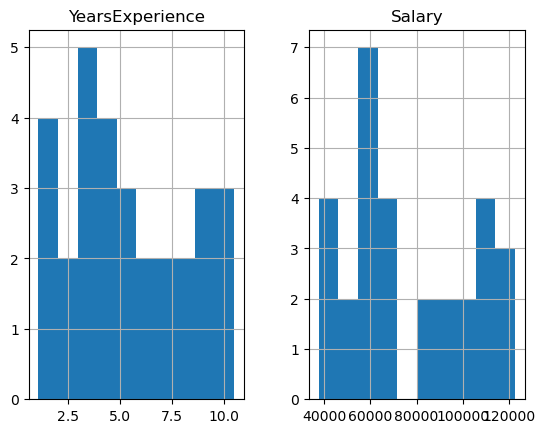

In [9]:
salary_data.hist()  #visualization

<Axes: >

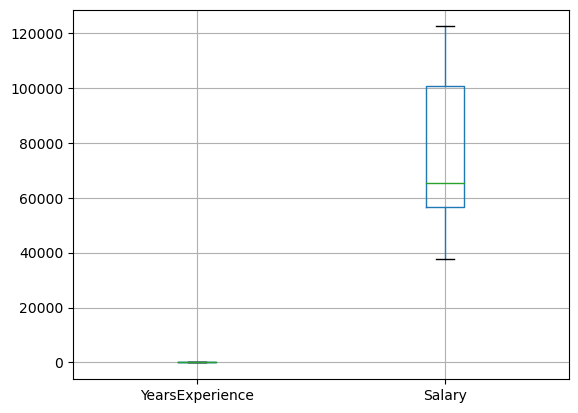

In [10]:
salary_data.boxplot()   #visualization
# no outliers in the data

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2ca1a63d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2ca1a7bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2ca3a1310>],
 'medians': [<matplotlib.lines.Line2D at 0x1c2ca1b9110>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2ca1a6f90>],
 'means': []}

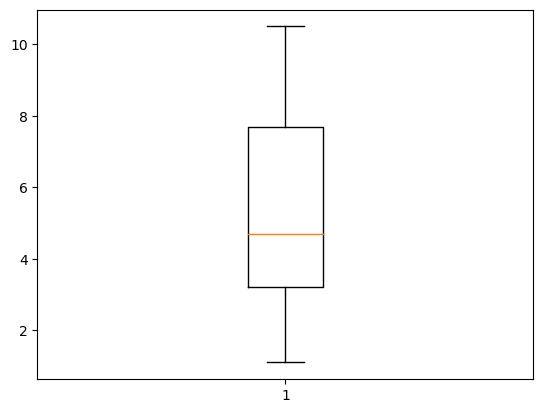

In [11]:
plt.boxplot(salary_data['YearsExperience'])

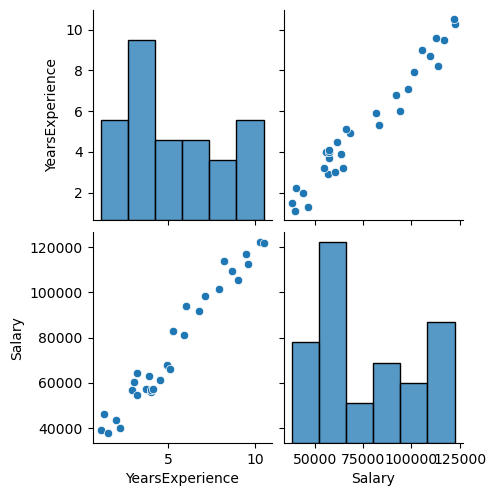

In [13]:
sns.pairplot(salary_data)

In [15]:
#correlation
salary_data.corr()   # strong correlation between salary and years of experience

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\sycmy\AppData\Local\Temp\ipykernel_21784\2584953720.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

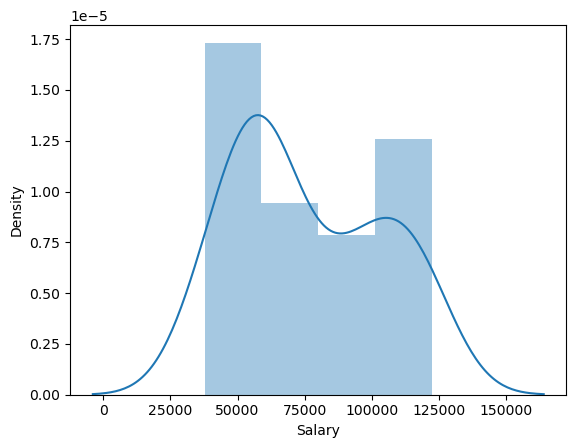

In [16]:
sns.distplot(salary_data['Salary'])

C:\Users\sycmy\AppData\Local\Temp\ipykernel_21784\1562048008.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

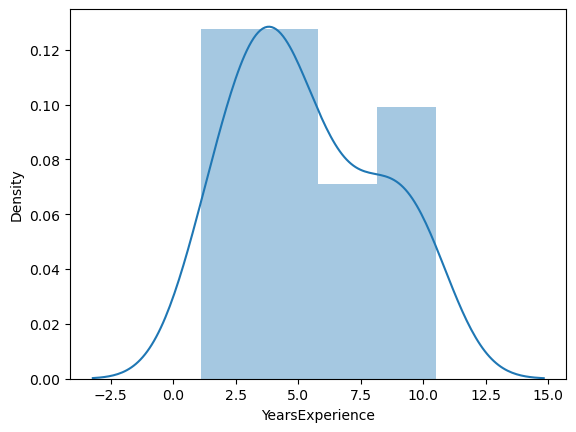

In [17]:
sns.distplot(salary_data['YearsExperience'])

In [18]:
# y= dependent variable= salary and x= independent variable= years experience

In [19]:
# 1) no transformation used
model=smf.ols("Salary~YearsExperience",data=salary_data).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

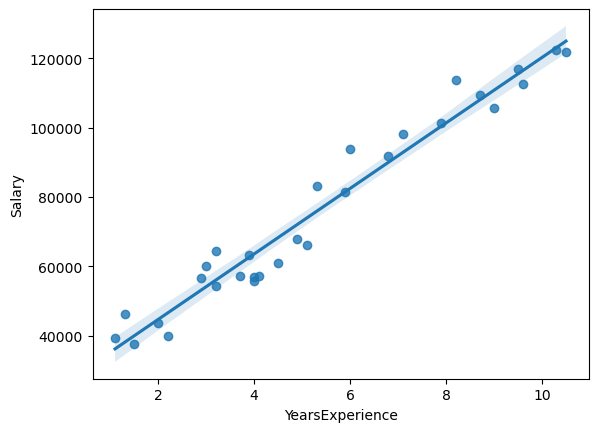

In [20]:
# plot to see best fit line
sns.regplot(x='YearsExperience',y='Salary',data=salary_data)

In [21]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [22]:
#linear equation is given by: salary= ((9449.962)*years experience)+(25792.2)

In [23]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [24]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [25]:
# For Hypothesis Testing:
# H0: There is no relation between years of experience and salary.
# H1: There is relation between years of experience and salary.
# Since, p value < 0.05 (significance level)
# Therefore, we reject null hypothesis(H0)

In [26]:
model.rsquared # r square value between 0 and 1

0.9569566641435086

In [27]:
# prediction for existing data point
salary_predict= ((9449.962321)*(9)+(25792.200199))
salary_predict

110841.861088

In [28]:
# prediction for new data point
new_salary_data=pd.Series([11,11.4])

In [29]:
newdata_pred=pd.DataFrame(new_salary_data,columns=['YearsExperience'])
newdata_pred

,YearsExperience
0,11.0
1,11.4


In [30]:
model.predict(newdata_pred)

0    129741.785735
1    133521.770663
dtype: float64

In [32]:
# 2) log transformation 
trf=FunctionTransformer(func=np.log1p)

In [33]:
x_transformed=trf.fit_transform(salary_data['YearsExperience'])
x_transformed.head()

0    0.741937
1    0.832909
2    0.916291
3    1.098612
4    1.163151
Name: YearsExperience, dtype: float64

In [34]:
transformed_model=smf.ols('Salary~x_transformed',data=salary_data).fit()

In [35]:
transformed_model.params

Intercept       -16452.302277
x_transformed    53271.412821
dtype: float64

In [36]:
transformed_model.tvalues

Intercept        -2.644069
x_transformed    15.413104
dtype: float64

In [37]:
transformed_model.pvalues
# Since p value is less than 0.05 (significance level)
# Therefore, we reject null hypothesis(H0)

Intercept        1.327164e-02
x_transformed    3.302453e-15
dtype: float64

In [38]:
transformed_model.rsquared
# r square value for log transformation is less than r square value with no transformation
# log transformation is not used

0.8945639276190438

In [39]:
# 3) Square transformation 
trf2=FunctionTransformer(func=np.square)

In [40]:
x_transformed2=trf2.fit_transform(salary_data['YearsExperience'])
x_transformed2.head()

0    1.21
1    1.69
2    2.25
3    4.00
4    4.84
Name: YearsExperience, dtype: float64

In [41]:
transformed2_model=smf.ols('Salary~x_transformed2',data=salary_data).fit()

In [42]:
transformed2_model.params

Intercept         48042.585515
x_transformed2      776.318773
dtype: float64

In [43]:
transformed2_model.tvalues

Intercept         21.973654
x_transformed2    17.397015
dtype: float64

In [44]:
transformed2_model.pvalues
# Since p value is less than 0.05 (significance level)
# Therefore, we reject null hypothesis(H0)

Intercept         3.389190e-19
x_transformed2    1.518127e-16
dtype: float64

In [45]:
transformed2_model.rsquared
# r square value is better, still less than r square value of no transformation
# square transformation is not used

0.9153198857852565

In [46]:
# 4) square root transformation
trf3=FunctionTransformer(func=np.sqrt)

In [47]:
x_transformed3=trf3.fit_transform(salary_data['YearsExperience'])
x_transformed3.head()

0    1.048809
1    1.140175
2    1.224745
3    1.414214
4    1.483240
Name: YearsExperience, dtype: float64

In [48]:
transformed3_model=smf.ols('Salary~x_transformed3',data=salary_data).fit()

In [49]:
transformed3_model.params

Intercept        -16055.769117
x_transformed3    41500.680583
dtype: float64

In [50]:
transformed3_model.tvalues

Intercept         -3.262308
x_transformed3    19.437148
dtype: float64

In [51]:
transformed3_model.pvalues
# Since p value is less than 0.05 (significance level)
# Therefore, we reject null hypothesis(H0)

Intercept         2.906965e-03
x_transformed3    8.565358e-18
dtype: float64

In [52]:
transformed3_model.rsquared
# r square value is better, still less than r square value of no transformation
# square root transformation is not used

0.9310009544993526

In [53]:
# 5) cube root transformation
trf4=FunctionTransformer(func=np.cbrt)

In [54]:
x_transformed4=trf4.fit_transform(salary_data['YearsExperience'])
x_transformed4.head()

0    1.032280
1    1.091393
2    1.144714
3    1.259921
4    1.300591
Name: YearsExperience, dtype: float64

In [55]:
transformed4_model=smf.ols('Salary~x_transformed4',data=salary_data).fit()

In [56]:
transformed4_model.params

Intercept        -57049.503555
x_transformed4    78964.327230
dtype: float64

In [57]:
transformed4_model.tvalues

Intercept         -7.140530
x_transformed4    16.961897
dtype: float64

In [58]:
transformed4_model.pvalues
# Since p value is less than 0.05 (significance level)
# Therefore, we reject null hypothesis(H0)

Intercept         9.043071e-08
x_transformed4    2.907409e-16
dtype: float64

In [59]:
transformed4_model.rsquared
# r square value is better, still less than r square value of no transformation
# cube root transformation is not used

0.9113098800320786